In [1]:
import pandas as pd

In [2]:
rowdata = {'电影名称':['无问西东','后来的我们','前任3','红海行动','战狼2','唐人街探案'],
           '打斗镜头':[1,3,5,100,103,67],
           '接吻镜头':[101,89,97,3,5,7],
           '电影类型':['爱情','爱情','爱情','动作','动作','动作']
          }
movie_data = pd.DataFrame(rowdata)
movie_data

,电影名称,打斗镜头,接吻镜头,电影类型
0,无问西东,1,101,爱情
1,后来的我们,3,89,爱情
2,前任3,5,97,爱情
3,红海行动,100,3,动作
4,战狼2,103,5,动作
5,唐人街探案,67,7,动作


In [3]:
new_data = [24,67]  #dist = list((((movie_data.iloc[:6,1:3]-new_data)**2).sum(1))**0.5)

In [4]:
#计算已知类别数据集中点与当前点的距离 计算欧式距离
dist = list ((((movie_data .iloc[:6,1:3]-new_data)**2).sum(1))**0.5)
dist

[41.048751503547585,
 30.4138126514911,
 35.510561809129406,
 99.35793878699377,
 100.42410069301094,
 73.81734213584231]

In [5]:
#将距离升序排列,然后选取距离最小的k个点
#dist_l = pd.DataFrame({'dist': dist, 'labels': (movie_data.iloc[:6, 3])})
dist_l = pd.DataFrame({'dist':dist,'labels':(movie_data.iloc[:6,3])})#form DataFrame 
# dr = dist_l.sort_values(by = 'dist')[: 4]sort 
dr = dist_l.sort_values(by = 'dist')[:4] #show 
dr

,dist,labels
1,30.413813,爱情
2,35.510562,爱情
0,41.048752,爱情
5,73.817342,动作


In [6]:
# 确定前k个点所在类别的出现频率
# re = dr.loc[:,'labels'].value_counts() counts
re = dr.loc[:,'labels'].value_counts()
re

爱情    3
动作    1
Name: labels, dtype: int64

In [7]:
# 选择频率最高的类别作为当前点的预测类别
result = []
result.append(re.index[0])
result

['爱情']

In [8]:
#将KNN 算法封装成一个函数，方便后面调用
import pandas as pd
"""
函数功能：KNN 算法分类器
参数说明：
dataset:训练集
new_data: 需要预测的数据集合
k：KNN算法中选择距离最近的几个数据

返回：
result:分类结果
"""
def classify(new,k,dataSet):
    result = []
    dist = list((((dataSet.iloc[:6,1:3]-new)**2).sum(1))**0.5)#计算欧式距离
    dist_l = pd.DataFrame({'dist':dist,'label':dataSet.iloc[:6,3]})#将欧式距离和标签形成一个表格
    dr = dist_l.sort_values(by='dist')[:k]#根据距离进行排序，然后选取前k个点
    re = dr.loc[:,'label'].value_counts()#统计标签频率
    result.append(re.index[0])
    return result

In [9]:
new = new_data
k = 5
dataSet = movie_data
classify(new,k,dataSet)

['爱情']

###准备数据，约会网站的KNN算法实现

In [10]:
datingTest = pd.read_table('datingTestSet.txt',header = None)#获取数据
datingTest.head()

,0,1,2,3
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike


In [11]:
datingTest

,0,1,2,3
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike
...,...,...,...,...
995,11145,3.410627,0.631838,smallDoses
996,68846,9.974715,0.669787,didntLike
997,26575,10.650102,0.866627,largeDoses
998,48111,9.134528,0.728045,largeDoses


In [12]:
datingTest.shape

(1000, 4)

In [13]:
datingTest.shape[0]

1000

In [14]:
datingTest.info()#展示详细信息提前了解

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   int64  
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 31.4+ KB


In [15]:
datingTest.iloc[:,-1]#最后一行

0      largeDoses
1      smallDoses
2       didntLike
3       didntLike
4       didntLike
          ...    
995    smallDoses
996     didntLike
997    largeDoses
998    largeDoses
999    largeDoses
Name: 3, Length: 1000, dtype: object

### 使用 Matplotlib 创建散点图,查看各数据的分布情况

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/hhl/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hhl/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hhl/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25103 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hhl/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hhl/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39057 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hhl/anaconda3/lib

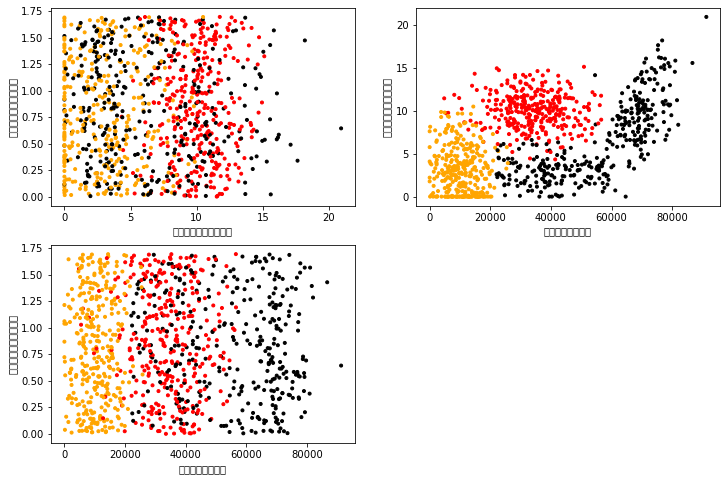

In [16]:
%matplotlib  inline
import  matplotlib as mpl
import matplotlib.pyplot as plt

#用不同的颜色将不同的标签区分
Colors = []
for i in range(datingTest.shape[0]): #遍历一遍
    m = datingTest.iloc[i,-1]#获取当前列的喜好
    if m=='didntLike':
        Colors.append('black')
    if m=='smallDoses':
        Colors.append('orange')
    if m=='largeDoses':
        Colors.append('red')
        
#绘制两两特征之间的散点图

plt.rcParams['font.sans-serif']=['Simhei']#将图中文字设置为黑色
pl=plt.figure(figsize=(12,8))#设置一个画布

fig1 = pl.add_subplot(221)#两行两列的第一个图
plt.scatter(datingTest.iloc[:,1],datingTest.iloc[:,2],marker = '.',c=Colors)
plt.xlabel('玩游戏视频所占时间比')
plt.ylabel('每周消费冰淇淋公升数')

fig2=pl.add_subplot(222)
plt.scatter(datingTest.iloc[:,0],datingTest.iloc[:,1],marker='.',c=Colors)
plt.xlabel('每年飞行常客里程')
plt.ylabel('玩游戏视频所占时间比')

fig3=pl.add_subplot(223)
plt.scatter(datingTest.iloc[:,0],datingTest.iloc[:,2],marker='.',c=Colors)
plt.xlabel('每年飞行常客里程')
plt.ylabel('每周消费冰淇淋公升数')
plt.show()


##因为不同的参数之间的权重不一样，在这里三个参数的权重应该是一致的，所以要对所有的数据进行归一化处理，这里用最简单的0-1归一化

In [29]:
"""
函数功能：归一化
参数说明：
dataSet: 原始数据集
返回：返回0-1标准化以后的数据集

"""

def minmax(dataSet):
    minDf = dataSet.min()
    maxDf = dataSet.max()
    normSet = (dataSet-minDf)/(maxDf-minDf)#归一化处理
    return normSet

In [30]:
minmax(datingTest.iloc[:,:3])#归一化以后的数据

,0,1,2
0,0.448325,0.398051,0.562334
1,0.158733,0.341955,0.987244
2,0.285429,0.068925,0.474496
3,0.823201,0.628480,0.252489
4,0.420102,0.079820,0.078578
...,...,...,...
995,0.122106,0.163037,0.372224
996,0.754287,0.476818,0.394621
997,0.291159,0.509103,0.510795
998,0.527111,0.436655,0.429005


In [31]:
datingTest.iloc[:,3]

0      largeDoses
1      smallDoses
2       didntLike
3       didntLike
4       didntLike
          ...    
995    smallDoses
996     didntLike
997    largeDoses
998    largeDoses
999    largeDoses
Name: 3, Length: 1000, dtype: object

In [20]:
datingT = pd.concat([minmax(datingTest.iloc[:,:3]),datingTest.iloc[:,3]],axis=1)
#pd.concat将归一化以后的数据和标签进行连接
datingT

,0,1,2,3
0,0.448325,0.398051,0.562334,largeDoses
1,0.158733,0.341955,0.987244,smallDoses
2,0.285429,0.068925,0.474496,didntLike
3,0.823201,0.628480,0.252489,didntLike
4,0.420102,0.079820,0.078578,didntLike
...,...,...,...,...
995,0.122106,0.163037,0.372224,smallDoses
996,0.754287,0.476818,0.394621,didntLike
997,0.291159,0.509103,0.510795,largeDoses
998,0.527111,0.436655,0.429005,largeDoses


### 将数据随机切割为测试集和训练集

In [25]:
"""
函数功能:切分训练集和测试集
参数说明:
dataSet:原始数据集
rate:训练集所占比例
返回:切分好的训练集和测试集
"""
def randSplit(dataSet,rate=0.9):
    n = dataSet.shape[0]
    m = int(n*rate)
    train = dataSet.iloc[:m,:]
    test = dataSet.iloc[m:,:]
    test.index = range(test.shape[0])#将序号重新排
    return train,test

In [26]:
train,test = randSplit(datingT)

In [27]:
train

,0,1,2,3
0,0.448325,0.398051,0.562334,largeDoses
1,0.158733,0.341955,0.987244,smallDoses
2,0.285429,0.068925,0.474496,didntLike
3,0.823201,0.628480,0.252489,didntLike
4,0.420102,0.079820,0.078578,didntLike
...,...,...,...,...
895,0.243665,0.486131,0.979099,largeDoses
896,0.165350,0.000000,0.808206,smallDoses
897,0.054967,0.359158,0.080380,smallDoses
898,0.111106,0.393932,0.058181,smallDoses


In [28]:
test

,0,1,2,3
0,0.513766,0.170320,0.262181,didntLike
1,0.089599,0.154426,0.785277,smallDoses
2,0.611167,0.172689,0.915245,didntLike
3,0.012578,0.000000,0.195477,smallDoses
4,0.110241,0.187926,0.287082,smallDoses
...,...,...,...,...
95,0.122106,0.163037,0.372224,smallDoses
96,0.754287,0.476818,0.394621,didntLike
97,0.291159,0.509103,0.510795,largeDoses
98,0.527111,0.436655,0.429005,largeDoses


In [26]:
train.shape #说明长宽

(900, 4)

### 分类器针对约会网站进行测试

In [33]:
"""
函数功能：KNN 算法分类器
参数说明：
返回结果：预测好分类的测试集
"""
def datingClass(train,test,k):
    n = train.shape[1]-1 #列数减1把那个分类的去掉
    m = test.shape[0]
    result = []
    for i in range(m):
        dist = list((((train.iloc[:,:n]-test.iloc[i,:n])**2).sum(1))**0.5)
        dist_l = pd.DataFrame({'dist':dist,'labels':train.iloc[:,n]})
        dr = dist_l.sort_values(by = 'dist')[: k]
        re = dr.loc[:, 'labels'].value_counts()
        result.append(re.index[0])#将预测的结果连接上去
        
    result = pd.Series(result)
    test['predict'] = result
    acc = (test.iloc[:,-1]==test.iloc[:,-2]).mean()#是对所有的数据取均值，得出准确率
    print('模型预测准确率为{acc}')
    return test

In [34]:
datingClass(train,test,5)

模型预测准确率为0.95


<ipython-input-33-9e04e0e9fc58>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predict'] = result


,0,1,2,3,predict
0,0.513766,0.170320,0.262181,didntLike,didntLike
1,0.089599,0.154426,0.785277,smallDoses,smallDoses
2,0.611167,0.172689,0.915245,didntLike,didntLike
3,0.012578,0.000000,0.195477,smallDoses,smallDoses
4,0.110241,0.187926,0.287082,smallDoses,smallDoses
...,...,...,...,...,...
95,0.122106,0.163037,0.372224,smallDoses,smallDoses
96,0.754287,0.476818,0.394621,didntLike,didntLike
97,0.291159,0.509103,0.510795,largeDoses,largeDoses
98,0.527111,0.436655,0.429005,largeDoses,largeDoses
